<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

### <center>Supervised Learning - Logistic Regression</center>

<center>Dr. Ahmad Al-Doulat </center>
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

<div class="alert alert-block alert-success">
    <h2 style="text-align: left">Logistic Regression</h2>
</div>

**Logistic regression** is a statistical model used to predict a dependent variable, given a set of independent variables.

The dependent variable is a discrete categorical variable (non continuous variable).

<div class="alert alert-block alert-success">
    <h2 style="text-align: left">Logistic Regression: Binary Classification</h2>
</div>

### Breast Cancer Classification 


### Dataset Description
<hr style="border:1px solid orange"> </hr>

**The dataset includes 30 independent variables and 1 dependent variable, as follows:**

- **Independent Variables**  
    For each of the following 10 features, there are three variables the mean, standard error and "worst" or largest (mean of the three largest values). Therefore, the total number of features are 30 features
    1. radius (mean of distances from center to points on the perimeter)
    2. texture (standard deviation of gray-scale values)
    3. perimeter
    4. area
    5. smoothness (local variation in radius lengths)
    6. compactness (perimeter^2 / area - 1.0)
    7. concavity (severity of concave portions of the contour)
    8. concave points (number of concave portions of the contour)
    9. symmetry
    10. fractal dimension ("coastline approximation" - 1)

- **Dependent Variables**  
    1. target: Breast Cancer: Benign (**B**) or Malignant(**M**)

### Example: Breast Cancer Classification  

**Process:**
1. read the dataset
2. preprocess the dataset
3. split the dataset into training and testing sets
4. train the logistic regression model
5. predict the class for the test set 
6. evaluate the model

### 1. Reading the dataset
<hr style="border:1px solid orange"> </hr>

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
dataset = pd.read_csv('breast_cancer_data.csv')
dataset.shape

(569, 33)

In [3]:
# exploring the dataset
dataset.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

In [4]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### 2. Dataset Preprocessing 

<hr style="border:1px solid orange"> </hr>

In [5]:
dataset.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
dataset.diagnosis.replace(['M', 'B'], [1,0], inplace=True)

In [7]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
dataset.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
dataset.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [9]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Dataset Visualization 

In [10]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

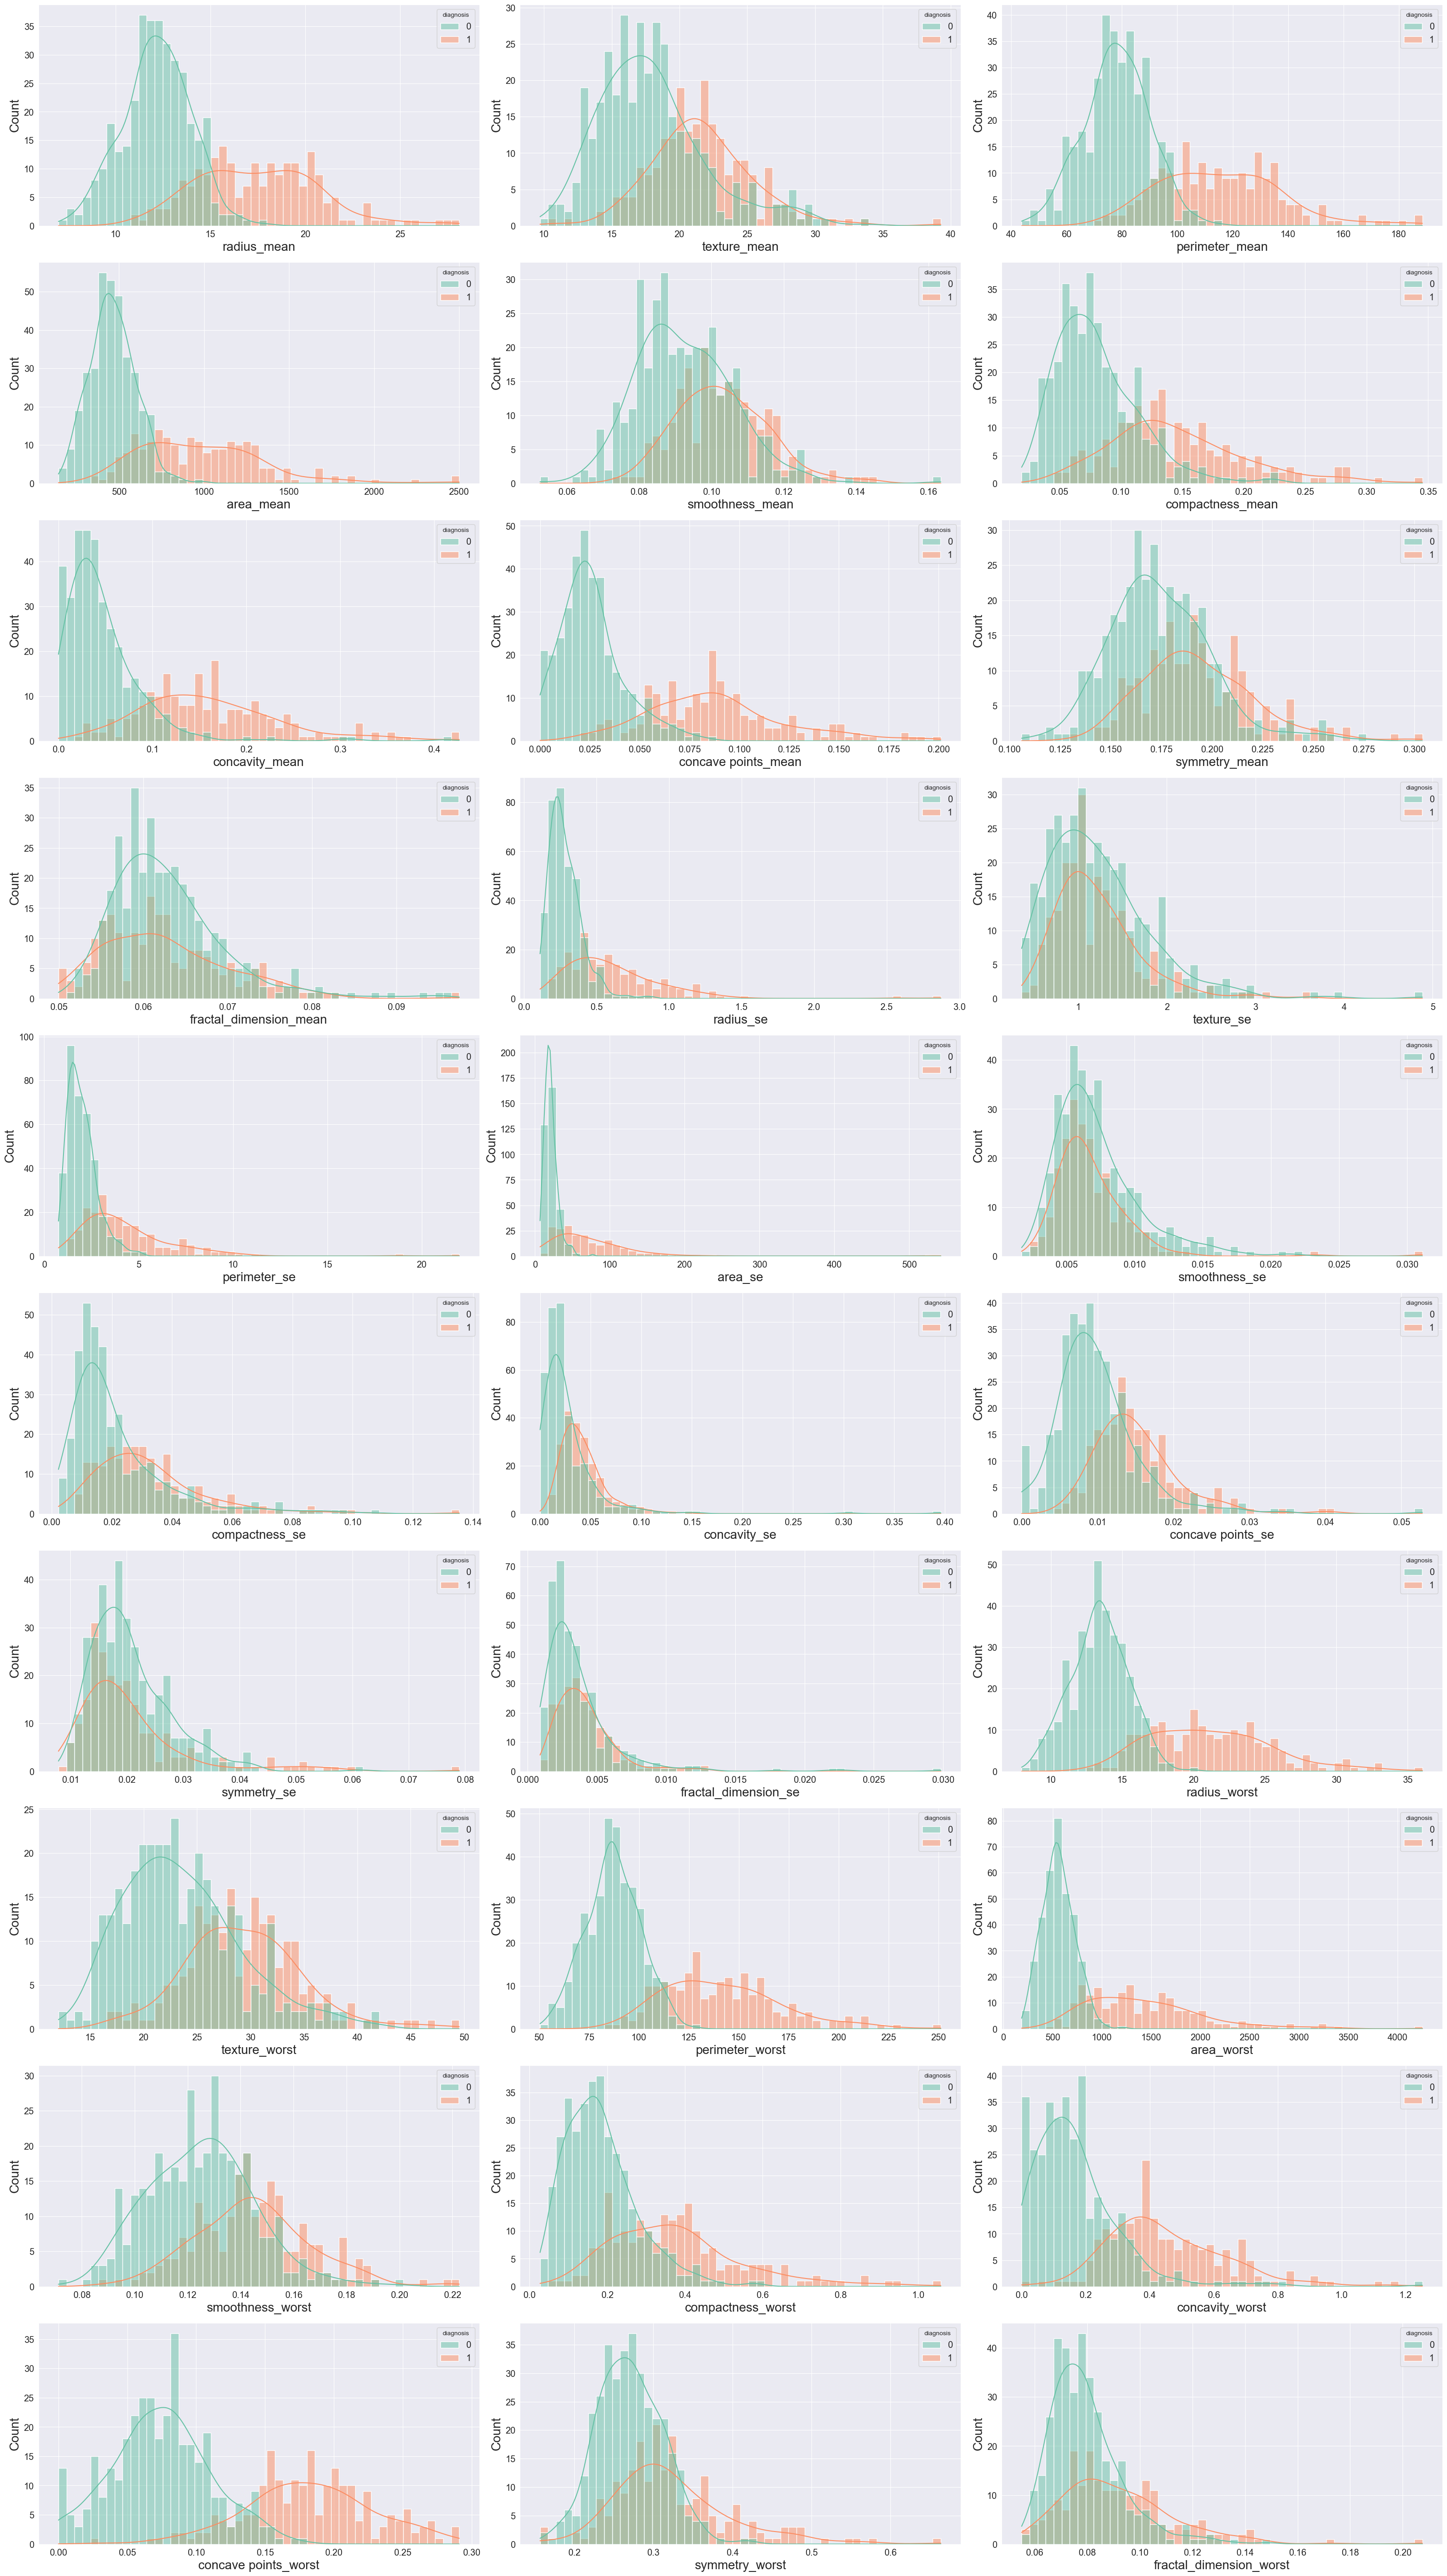

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('diagnosis', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(dataset, x=col, hue='diagnosis', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

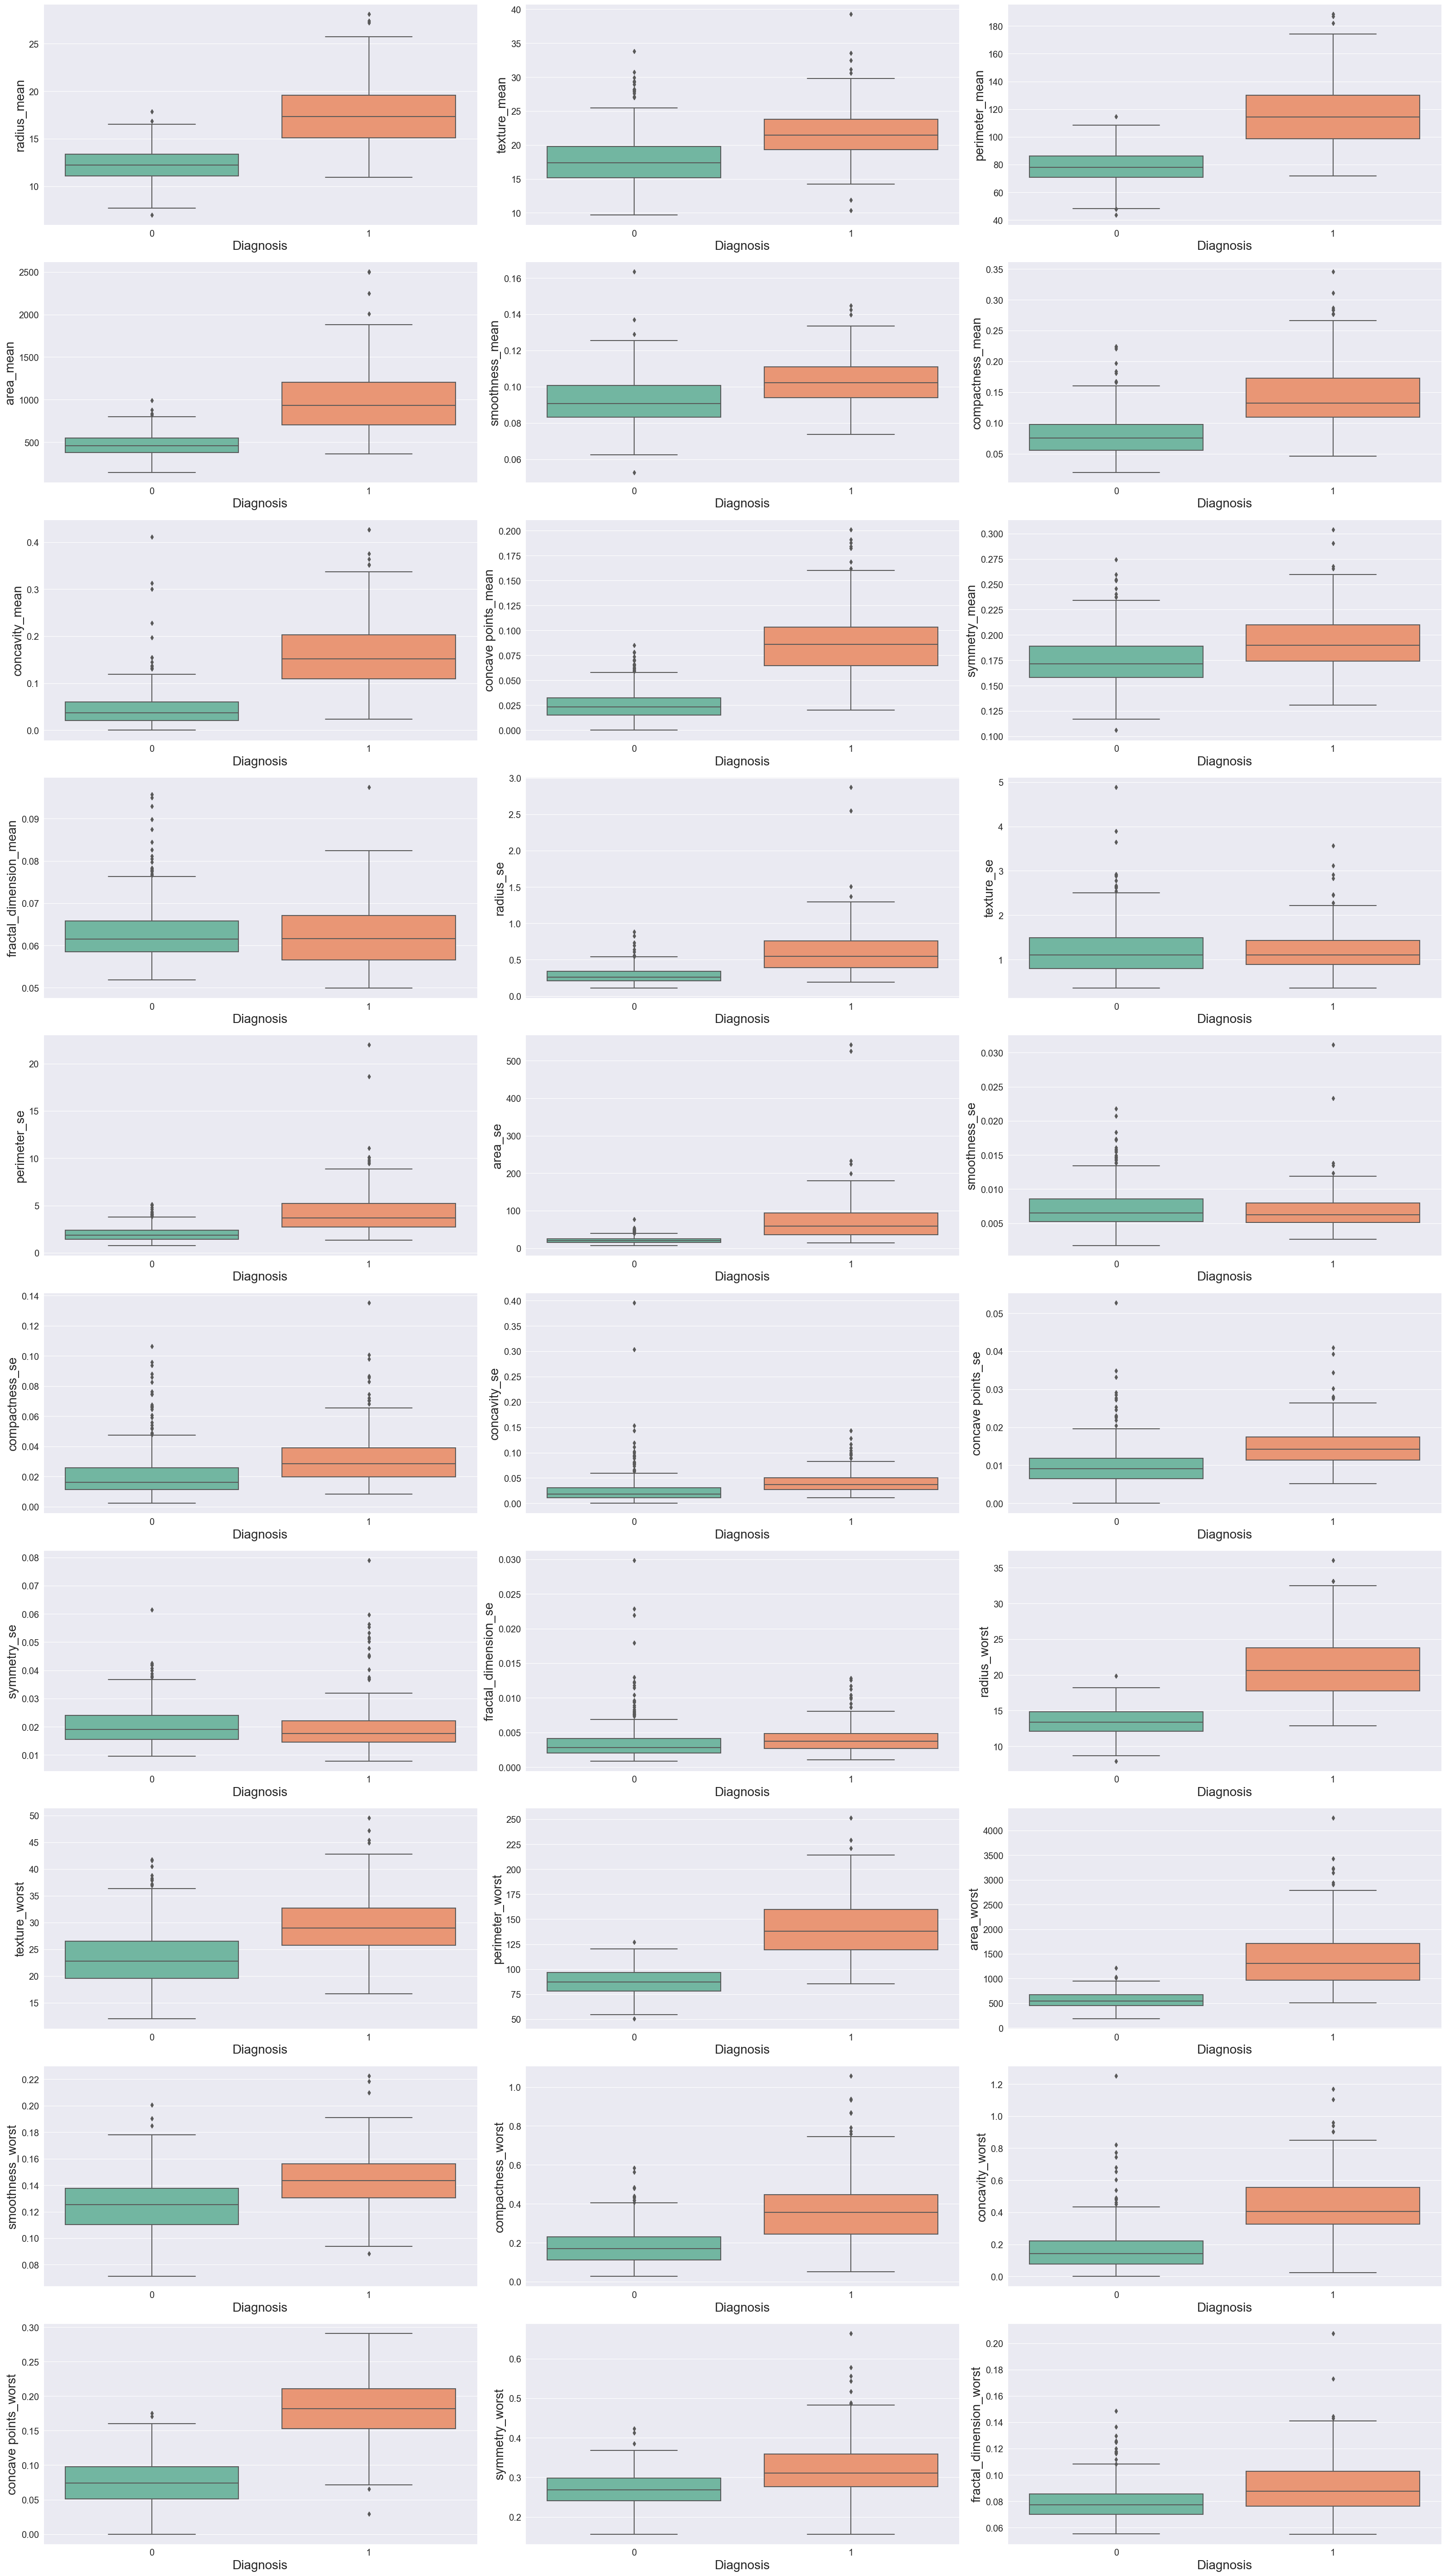

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('diagnosis', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=dataset, x='diagnosis', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('Diagnosis', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

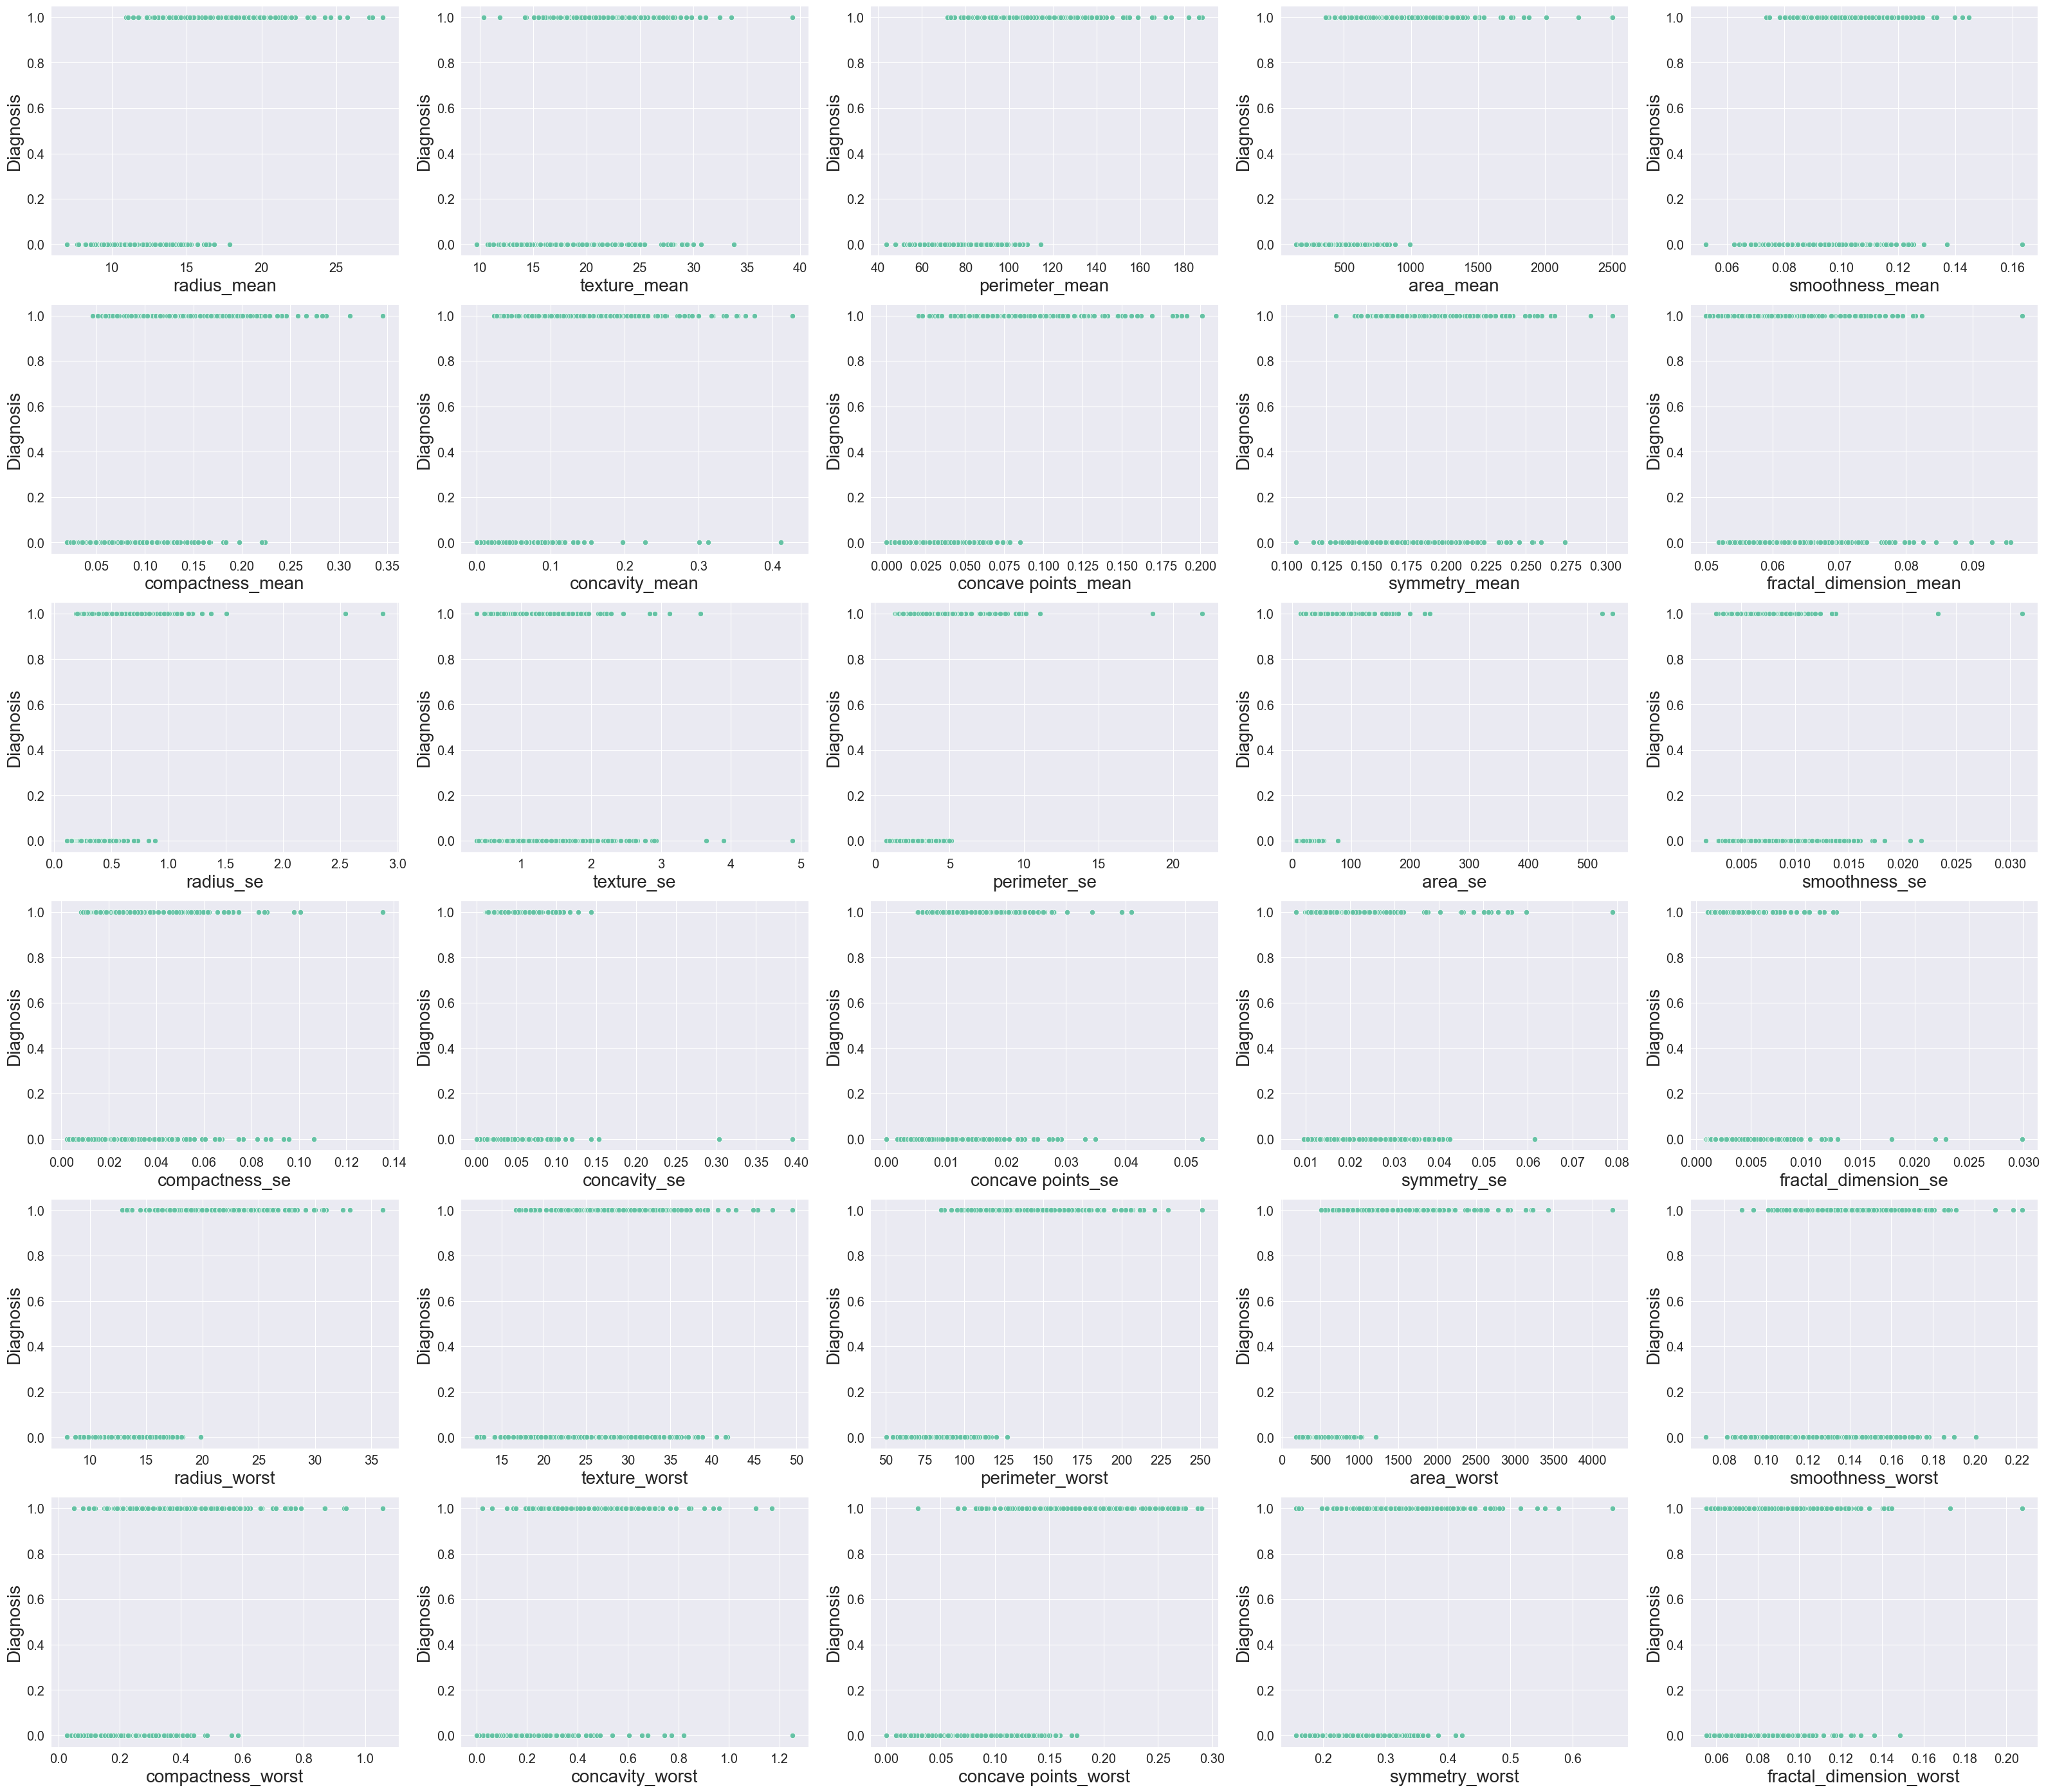

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(32, 32))

num_cols = 5
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('diagnosis', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=dataset, x=col, y='diagnosis')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Diagnosis', fontsize=20)

plt.tight_layout()
plt.show()


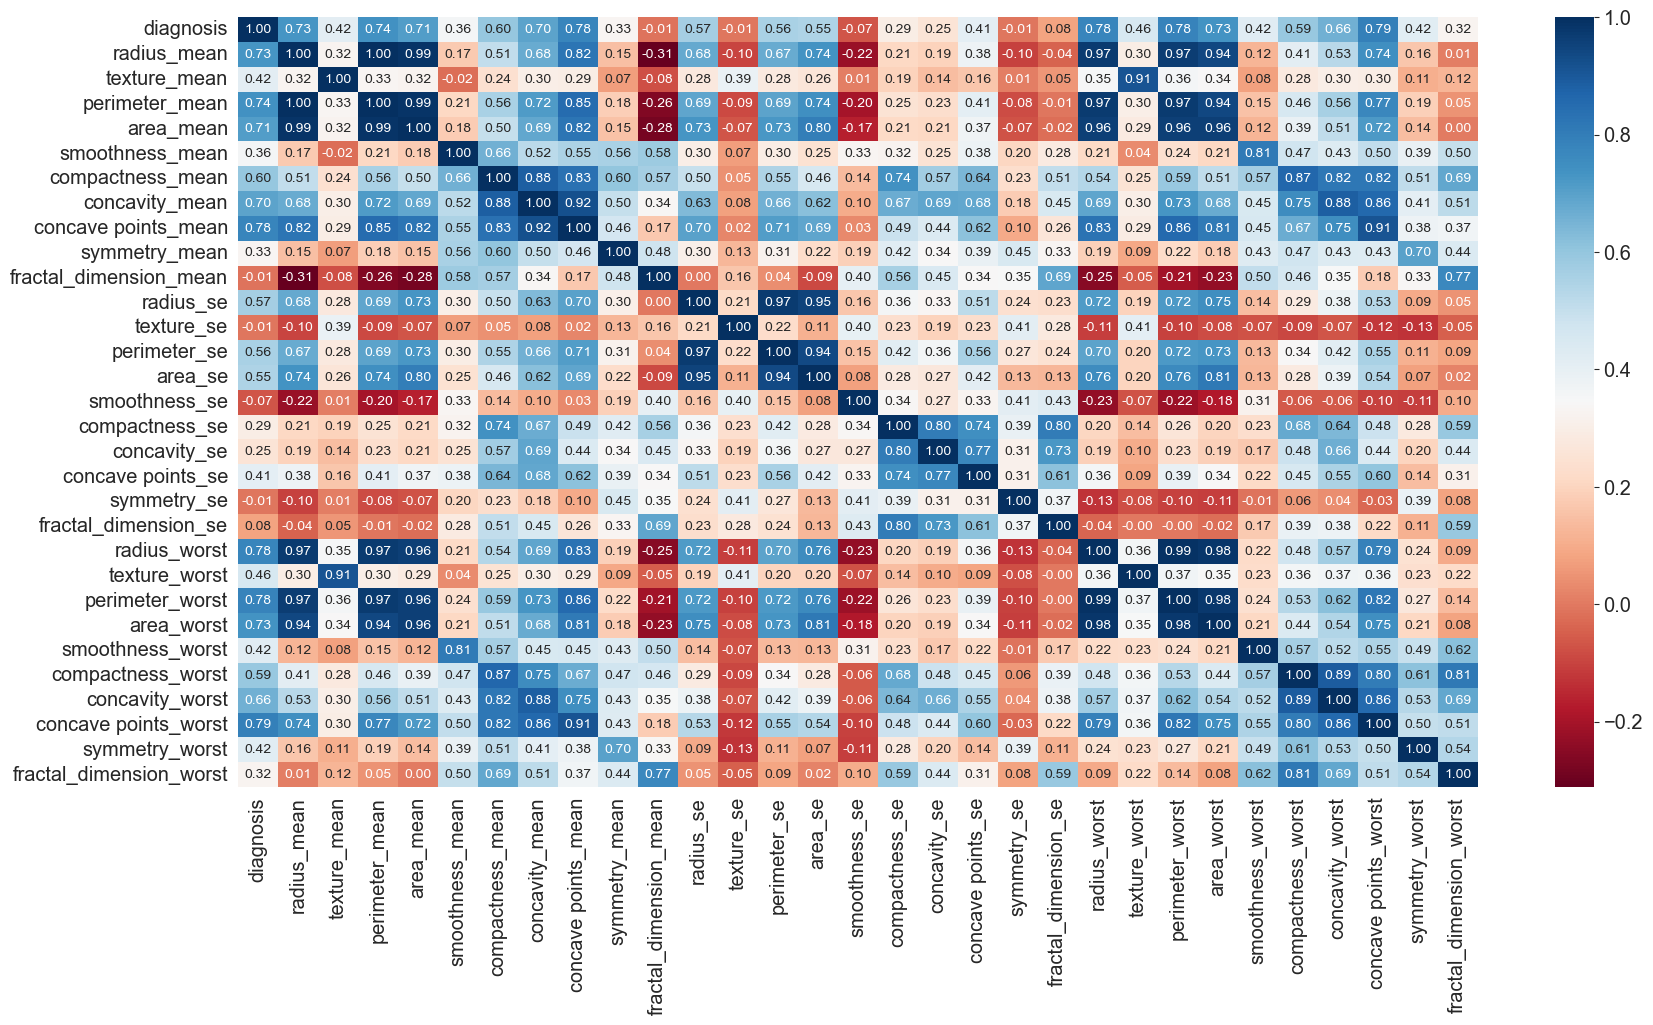

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.corr(), cmap='RdBu', annot=True, fmt=".2f");

#### Splitting the Dataset 

In [15]:
# Getting independent and dependent variables 
y = dataset.diagnosis.values
X = dataset.drop(['diagnosis'], axis=1)

In [16]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Normalizing the independent variables: Makes the convergence faster 
X_train=(X_train-np.min(X_train, axis=0))/(np.max(X_train, axis=0)-np.min(X_train, axis=0))
X_test=(X_test-np.min(X_test, axis=0))/(np.max(X_test, axis=0)-np.min(X_test, axis=0))

In [18]:
X_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
338     0.145251      0.324481        0.142492   0.070965         0.522103   
427     0.180747      0.509129        0.172759   0.091792         0.384273   
406     0.433480      0.213693        0.418147   0.278473         0.459650   
96      0.246060      0.337344        0.234953   0.130477         0.563376   
490     0.249373      0.528216        0.237648   0.137010         0.318128   
..           ...           ...             ...        ...              ...   
277     0.559847      0.426141        0.532859   0.406575         0.397524   
9       0.259312      0.594606        0.277659   0.140997         0.716520   
359     0.116191      0.357261        0.110773   0.057306         0.524275   
192     0.129632      0.353112        0.117062   0.061336         0.183230   
559     0.214350      0.590041        0.212356   0.110286         0.434235   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
338          0.184508        0.058833             0.088221       0.419192   
427          0.130299        0.084677             0.069781       0.482828   
406          0.224745        0.128866             0.225050       0.340909   
96           0.175296        0.058341             0.146173       0.424242   
490          0.111705        0.040159             0.062674       0.244444   
..                ...             ...                  ...            ...   
277          0.135128        0.187910             0.290408       0.247475   
9            0.754126        0.532568             0.424602       0.489899   
359          0.137593        0.063496             0.069881       0.225253   
192          0.013903        0.000000             0.000000       0.299495   
559          0.283268        0.260544             0.204026       0.165657   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
338                0.281171  ...      0.114906       0.394989   
427                0.206613  ...      0.171825       0.533582   
406                0.185131  ...      0.347919       0.201493   
96                 0.345198  ...      0.174315       0.237207   
490                0.206403  ...      0.221985       0.532249   
..                      ...  ...           ...            ...   
277                0.000000  ...      0.427962       0.327292   
9                  0.683867  ...      0.254714       0.763859   
359                0.413437  ...      0.145500       0.346482   
192                0.305602  ...      0.072501       0.234808   
559                0.331508  ...      0.161864       0.670043   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
338         0.107426    0.048860          0.455854           0.109546   
427         0.165745    0.074789          0.390477           0.138070   
406         0.326162    0.187451          0.326421           0.140592   
96          0.158026    0.076190          0.282837           0.064315   
490         0.210817    0.107575          0.359440           0.148548   
..               ...         ...               ...                ...   
277         0.391404    0.258258          0.350855           0.086067   
9           0.235271    0.129326          0.753682           1.000000   
359         0.126401    0.062525          0.410289           0.075298   
192         0.058967    0.029149          0.000000           0.000000   
559         0.158723    0.071028          0.387176           0.217724   

     concavity_worst  concave points_worst  symmetry_worst  \
338         0.084265              0.223872        0.261975   
427         0.153914              0.257837        0.275971   
406         0.184505              0.388908        0.239109   
96          0.039776              0.202618        0.130495   
490         0.098243              0.218223        0.302582   
..               ...                   ...             ...   
277         0.176518              0.445746        0

In [19]:
X_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
512     0.390001      0.338738        0.387903   0.284093         0.459238   
457     0.376934      0.505464        0.344591   0.269959         0.226854   
439     0.432639      0.167430        0.396966   0.321531         0.142360   
298     0.449144      0.255904        0.412517   0.341528         0.000000   
37      0.364555      0.264716        0.330376   0.259359         0.246518   
..           ...           ...             ...        ...              ...   
213     0.666460      0.516391        0.634612   0.578259         0.356821   
519     0.345299      0.204089        0.329422   0.236806         0.478697   
432     0.856268      0.304195        0.818737   0.805292         0.486891   
516     0.727667      0.340853        0.694715   0.656443         0.420320   
500     0.502785      0.205499        0.484163   0.383852         0.338693   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
512          0.362597        0.338884             0.448272       0.536113   
457          0.058025        0.065009             0.113439       0.244275   
439          0.070098        0.048945             0.145474       0.226659   
298          0.058506        0.058044             0.075370       0.253670   
37           0.011817        0.060084             0.160340       0.155021   
..                ...             ...                  ...            ...   
213          0.258879        0.394465             0.361876       0.061656   
519          0.249567        0.090994             0.164290       0.538462   
432          0.369019        0.500235             0.690620       0.305931   
516          0.291632        0.367964             0.518431       0.385790   
500          0.328881        0.181074             0.336917       0.273048   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
512                0.513845  ...      0.383104       0.505687   
457                0.125056  ...      0.277115       0.654209   
439                0.125502  ...      0.305927       0.169321   
298                0.125502  ...      0.373328       0.362691   
37                 0.187360  ...      0.223091       0.283068   
..                      ...  ...           ...            ...   
213                0.188030  ...      0.468512       0.454014   
519                0.357079  ...      0.282260       0.248294   
432                0.229790  ...      0.672258       0.356516   
516                0.204779  ...      0.663511       0.393240   
500                0.412014  ...      0.401111       0.205720   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
512         0.375125    0.281165          0.690887           0.412953   
457         0.228029    0.182417          0.422298           0.073135   
439         0.263049    0.208563          0.181981           0.067538   
298         0.325002    0.269633          0.097635           0.207456   
37          0.182383    0.141797          0.121760           0.000000   
..               ...         ...               ...                ...   
213         0.422576    0.363619          0.378946           0.161952   
519         0.243668    0.178308          0.597587           0.184582   
432         0.593664    0.577458          0.776647           0.301748   
516         0.568268    0.583995          0.613609           0.252351   
500         0.351066    0.287002          0.277165           0.208551   

     concavity_worst  concave points_worst  symmetry_worst  \
512         0.436410              0.704811        0.516549   
457         0.118803              0.206357        0.219182   
439         0.053504              0.282337        0.138911   
298         0.133761              0.258763        0.269221   
37          0.041308              0.172268        0.100078   
..               ...                   ...             ...   
213         0.239573              0.377663        0

### 3. Model Training 
<hr style="border:1px solid orange"> </hr>

In [20]:
# fitting the logistic regression model to the training data
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [21]:
# predicting the class for the test data
y_pred = logre.predict(X_test)

In [22]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [23]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

### Using Custom Threshold

In [24]:
custom_threshold = 0.3
y_pred_custom = (logre.predict_proba(X_test)[:, 1] > custom_threshold).astype(int)

# In logistic regression, the predict_proba method returns 
# the probability estimates for each class. 
# For binary classification tasks, there are two classes (0 and 1). 
# The [:, 1] indexing is used to extract the probabilities corresponding 
# to the positive class (class 1).

In [25]:
y_pred_custom

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1])

### 4. Model Evaluation  
<hr style="border:1px solid orange"> </hr>

**Model accuracy** is a common metric used to evaluate the overall performance of a classification model, including binary classification models. It represents the proportion of correctly classified instances (both true positives and true negatives) out of the total number of instances in the dataset.

The formula for accuracy is:

$$ \text{Accuracy} = \frac{\text{True Positives + True Negatives}}{\text{Total Instances}} $$

In words, accuracy measures the percentage of correctly predicted instances (both positive and negative) relative to the total number of instances.

While accuracy is a straightforward and intuitive metric, it may not always be sufficient, especially in scenarios where the class distribution is imbalanced. In cases of imbalanced classes, where one class significantly outnumbers the other, accuracy might be high simply because the model is biased toward the majority class.

For a more comprehensive evaluation, especially in imbalanced scenarios, it's often recommended to consider other metrics like precision, recall, specificity, sensitivity, and the F1-score. These metrics provide a more detailed understanding of how well the model performs with respect to specific aspects such as minimizing false positives or capturing all positive instances.

In summary, accuracy is a useful metric to provide an overall assessment of a model's performance, but it should be interpreted with caution, especially in imbalanced datasets where other metrics may provide a more nuanced view of the model's effectiveness.

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9385964912280702


### Evaluating the Model with the custom threshold

In [28]:
print(accuracy_score(y_test,y_pred_custom))

0.8859649122807017


When evaluating a logistic regression model, precision, recall, F1-score, and support are common metrics used to assess its performance, especially in binary classification tasks. Here's a brief explanation of each:

1. **Precision:**
   - Precision is the ratio of true positive predictions to the total number of positive predictions made by the model.
   - Precision focuses on the accuracy of the positive predictions and is calculated as follows:
   
   $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $$
     
   - Precision is particularly important when the cost of false positives is high, and you want to minimize the number of incorrect positive predictions.

2. **Recall (Sensitivity or True Positive Rate):**
   - Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset.
   - Recall measures the model's ability to capture all positive instances and is calculated as follows:
     
        $$ \text{Recall (Sensitivity)} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $$
     
   - Recall is crucial when the cost of false negatives is high, and you want to ensure that all positive instances are identified.

3. **F1-score:**
   - The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both precision and recall.
   - It is calculated using the following formula:
   
        $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}} $$

     
   - F1-score is useful when there is an uneven class distribution or when both false positives and false negatives need to be minimized.

4. **Support:**
   - Support represents the number of actual occurrences of each class in the specified dataset.
   - In a binary classification context, it can be seen as the count of true positive instances for the positive class.
   - Support is not used in the calculation of precision, recall, or F1-score, but it can provide context about the distribution of the classes in the dataset.

When evaluating a logistic regression model, you may look at a combination of these metrics to get a comprehensive understanding of its performance. The choice of which metric to prioritize depends on the specific goals and requirements of your application.

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94        67
           1       0.87      1.00      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.94      0.94       114



[[60  7]
 [ 0 47]]


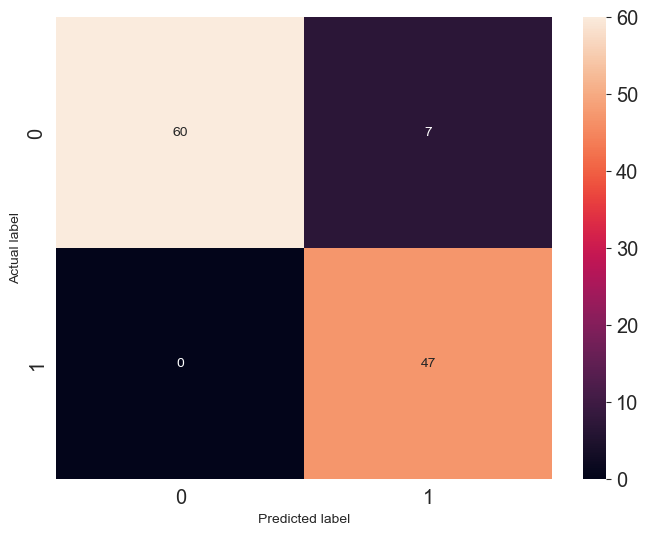

In [106]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

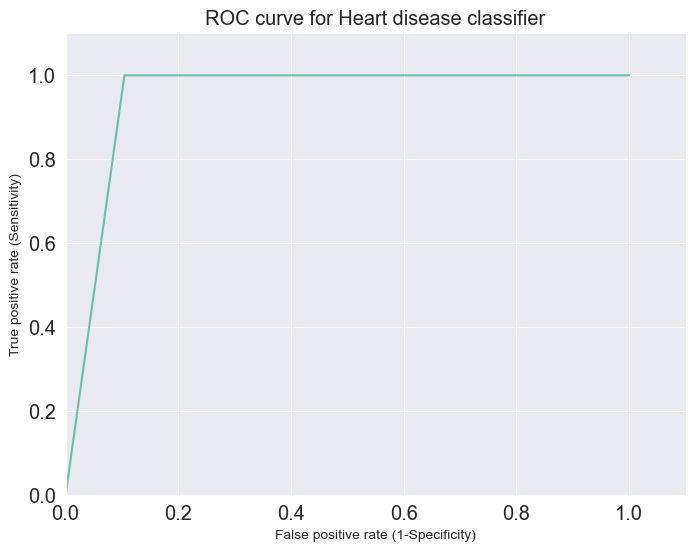

In [107]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [108]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9477611940298508

<div class="alert alert-block alert-success">
    <h2 style="text-align: left">Logistic Regression: Multiclass Classification</h2>
</div>

In [109]:
from sklearn.datasets import load_digits
digits = load_digits()

In [110]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [111]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [112]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


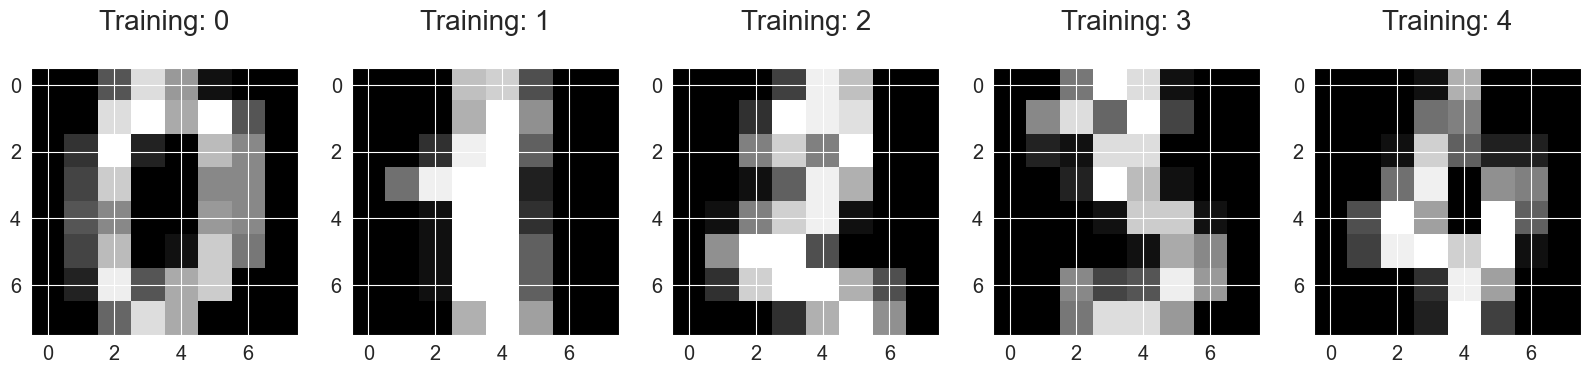

In [113]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [115]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))

In [116]:
logisticRegr = LogisticRegression(max_iter=1000)

In [117]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [118]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

array([2])

In [119]:
logisticRegr.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [120]:
predictions = logisticRegr.predict(X_test)

### Model Evaluation  
<hr style="border:1px solid orange"> </hr>

In [121]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9622222222222222


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  1  1]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  2  0  0 46  0  0]
 [ 0  3  1  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


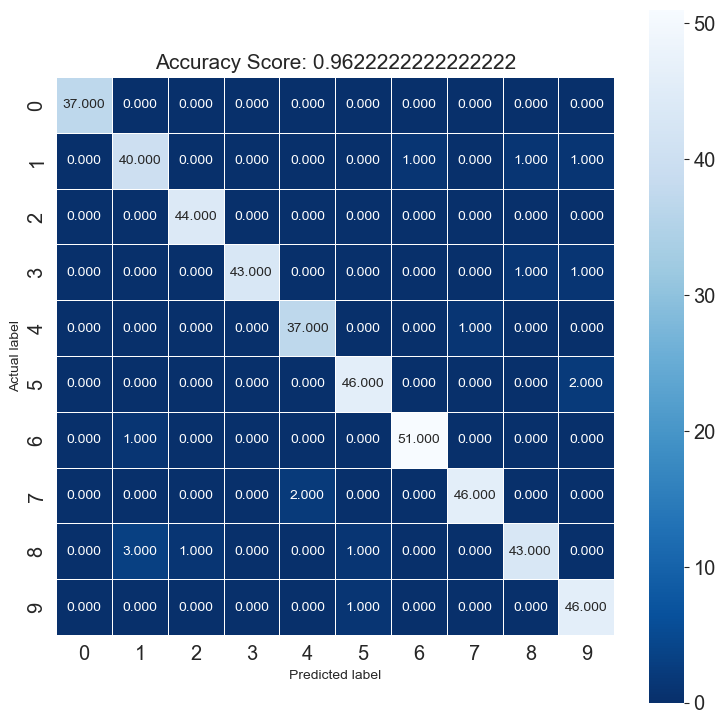

In [123]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# MNIST Dataset

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

C:\Users\aldou\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))

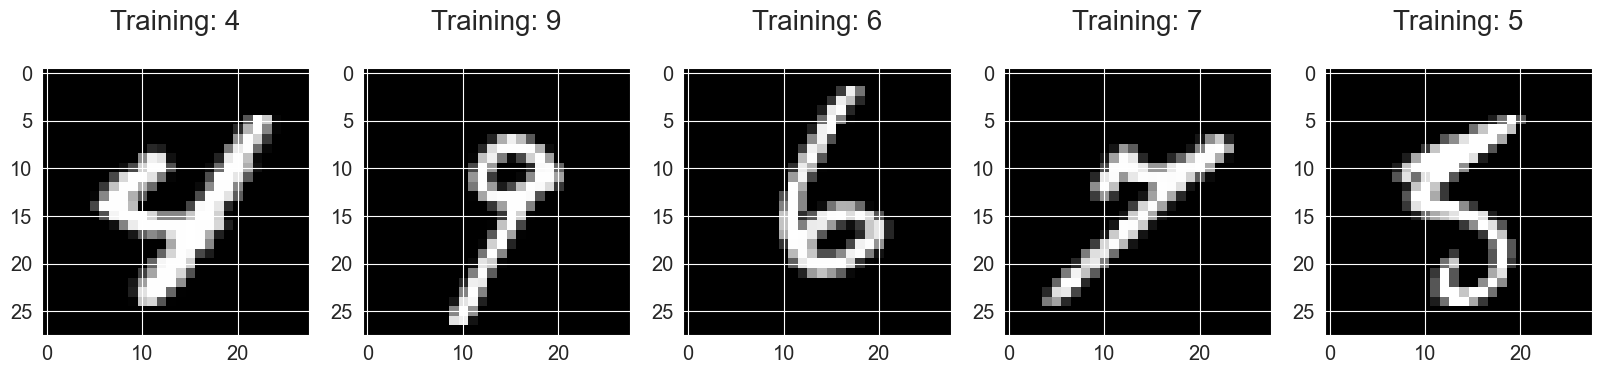

In [128]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % int(label), fontsize = 20)

In [129]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [130]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

array(['0'], dtype=object)

In [131]:
logisticRegr.predict(X_test[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [132]:
predictions = logisticRegr.predict(X_test)

In [133]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9182857142857143


In [134]:
import numpy as np 
import matplotlib.pyplot as plt

misclassifiedIndexes = []
for index, (label, predict) in enumerate(zip(y_test, predictions)):
    if label != predict: 
        print(f"Number: {label} @ index: {index} misclassified as {predict}")
        misclassifiedIndexes.append(index)

Number: 7 @ index: 4 misclassified as 4
Number: 9 @ index: 5 misclassified as 7
Number: 3 @ index: 18 misclassified as 9
Number: 5 @ index: 61 misclassified as 8
Number: 8 @ index: 78 misclassified as 2
Number: 2 @ index: 82 misclassified as 5
Number: 3 @ index: 129 misclassified as 7
Number: 9 @ index: 134 misclassified as 2
Number: 8 @ index: 141 misclassified as 4
Number: 3 @ index: 161 misclassified as 5
Number: 5 @ index: 192 misclassified as 3
Number: 4 @ index: 194 misclassified as 7
Number: 8 @ index: 197 misclassified as 3
Number: 4 @ index: 211 misclassified as 2
Number: 5 @ index: 219 misclassified as 3
Number: 9 @ index: 224 misclassified as 4
Number: 3 @ index: 256 misclassified as 9
Number: 8 @ index: 259 misclassified as 3
Number: 8 @ index: 268 misclassified as 2
Number: 9 @ index: 273 misclassified as 7
Number: 8 @ index: 276 misclassified as 5
Number: 7 @ index: 312 misclassified as 9
Number: 8 @ index: 322 misclassified as 0
Number: 3 @ index: 332 misclassified as 2


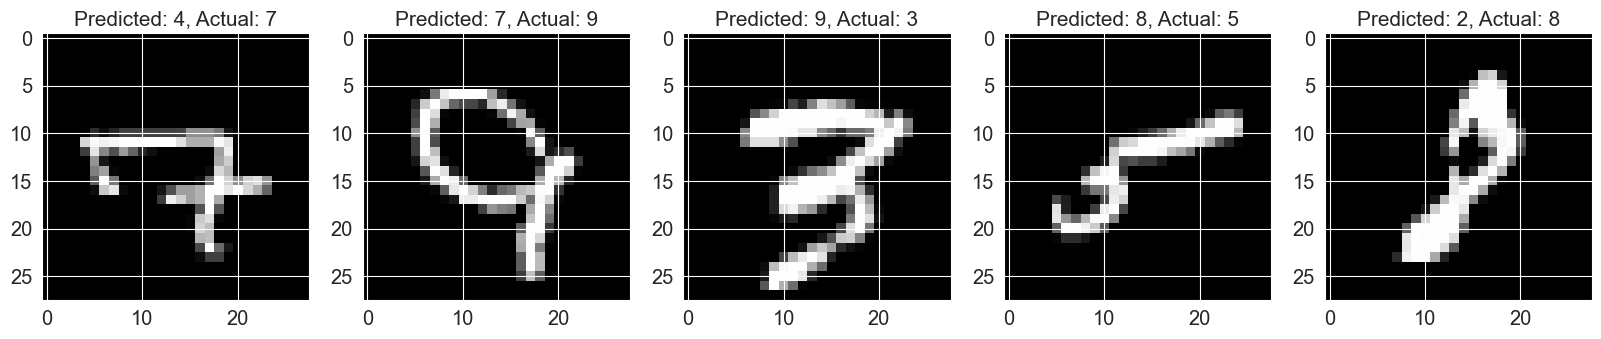

In [135]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.
              format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

The concept of AUC (Area Under the ROC Curve) can be extended to evaluate the performance of a multiclass classification model. However, the calculation and interpretation become more complex compared to the binary classification case.

In multiclass scenarios, you can calculate a separate AUC for each pair of classes (one-versus-one approach) or aggregate the results using various methods. One common approach is to use micro, macro, or weighted averaging.

1. **Micro-Averaging AUC:**
   - Compute the ROC curve and AUC globally, considering all classes collectively. This involves treating each prediction as a binary prediction, and then computing the AUC.

2. **Macro-Averaging AUC:**
   - Calculate the AUC for each class independently and then average them. This approach treats each class equally, regardless of class size.

3. **Weighted-Averaging AUC:**
   - Similar to macro-averaging, but it takes into account the class imbalance by giving more weight to the classes with more instances.

In [136]:
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming y_test and predictions are your true labels and predicted labels, respectively
# Convert y_test to one-hot encoding
y_true_one_hot = label_binarize(y_test, classes=np.unique(y_test))
# Convert predictions to one-hot encoding
y_predict_one_hot = label_binarize(predictions, classes=np.unique(predictions))

In [137]:
y_true_one_hot

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [138]:
y_predict_one_hot

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [139]:
# Calculate micro-averaging AUC
micro_auc = roc_auc_score(y_true_one_hot, y_predict_one_hot, average='micro')

# Calculate macro-averaging AUC
macro_auc = roc_auc_score(y_true_one_hot, y_predict_one_hot, average='macro')

# Calculate weighted-averaging AUC
weighted_auc = roc_auc_score(y_true_one_hot, y_predict_one_hot, average='weighted')

print("Micro-Averaging AUC:", micro_auc)
print("Macro-Averaging AUC:", macro_auc)
print("Weighted-Averaging AUC:", weighted_auc)

Micro-Averaging AUC: 0.9546031746031745
Macro-Averaging AUC: 0.95404615787623
Weighted-Averaging AUC: 0.9546459535218711


The choice of evaluation metrics in a multiclass classification scenario depends on the specific goals, characteristics of the dataset, and the importance assigned to different aspects of model performance. Here are scenarios where you might prefer different metrics:

1. **Accuracy:**
   - **Scenario:** Balanced Class Distribution
   - **Consideration:** Use accuracy when the classes are well-balanced, and each class is equally important. It provides a general measure of overall correctness.

2. **Micro-Averaging Metrics (Micro-Averaging AUC, Micro-Averaging Precision, Micro-Averaging Recall, Micro-Averaging F1-Score):**
   - **Scenario:** Unequal Class Distribution, Equal Importance to Each Instance
   - **Consideration:** Micro-averaging is suitable when class imbalance is present, and each instance is considered equally important. It provides a global measure treating all instances equally.

3. **Macro-Averaging Metrics (Macro-Averaging AUC, Macro-Averaging Precision, Macro-Averaging Recall, Macro-Averaging F1-Score):**
   - **Scenario:** Equal Importance to Each Class, Balanced or Imbalanced Class Distribution
   - **Consideration:** Macro-averaging is suitable when each class is considered equally important. It provides a per-class evaluation and is less sensitive to class imbalance compared to micro-averaging.

4. **Weighted-Averaging Metrics (Weighted-Averaging AUC, Weighted-Averaging Precision, Weighted-Averaging Recall, Weighted-Averaging F1-Score):**
   - **Scenario:** Unequal Class Distribution, Class Importance Varies
   - **Consideration:** Weighted-averaging is suitable when there is a class imbalance, and you want to account for the importance of each class. It gives more weight to larger classes.

7. **AUC (Area Under the ROC Curve):**
   - **Scenario:** Binary or Multiclass Classification with Probability Outputs
   - **Consideration:** AUC is valuable when your model provides probability outputs. It is commonly used for binary classification but can be extended to multiclass problems. Micro, macro, and weighted averaging can be applied based on the specific context.

Ultimately, the choice of metrics should align with the objectives of your application. It's common to consider a combination of metrics to gain a comprehensive understanding of the model's performance from different perspectives.